In [ ]:
import pandas as pd

In [ ]:
path2 = "/content/Combined Data.csv.zip"
df = pd.read_csv(path2)


In [ ]:
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
print(df.columns)
df['statement'].fillna('', inplace=True)

df.set_index('id', inplace=True)


Index(['id', 'statement', 'status'], dtype='object')


<ipython-input-4-6d616892ece9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['statement'].fillna('', inplace=True)


In [ ]:
diagonses = df["status"].unique()
print(diagonses)

['Anxiety' 'Normal' 'Depression' 'Suicidal' 'Stress' 'Bipolar'
 'Personality disorder']


In [ ]:
df.index.name = 'id'

In [ ]:
display(df)
df.shape



,statement,status
id,,
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,Is there any way to sleep better? I can't slee...,Anxiety


(53043, 2)

status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64


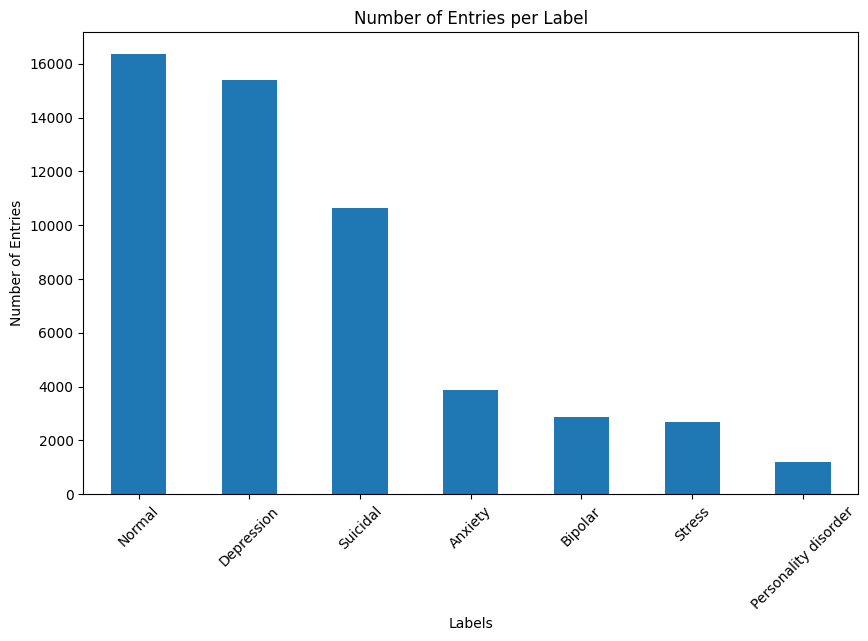

In [ ]:
# Count the number of entries per label
import matplotlib.pyplot as plt # import the library
label_counts = df['status'].value_counts()


print(label_counts)

# Bar graph for label counts
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Number of Entries per Label')
plt.xlabel('Labels')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.show()

<ipython-input-10-065990a983c5>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_lengths = df.groupby('status').apply(calculate_avg_length)


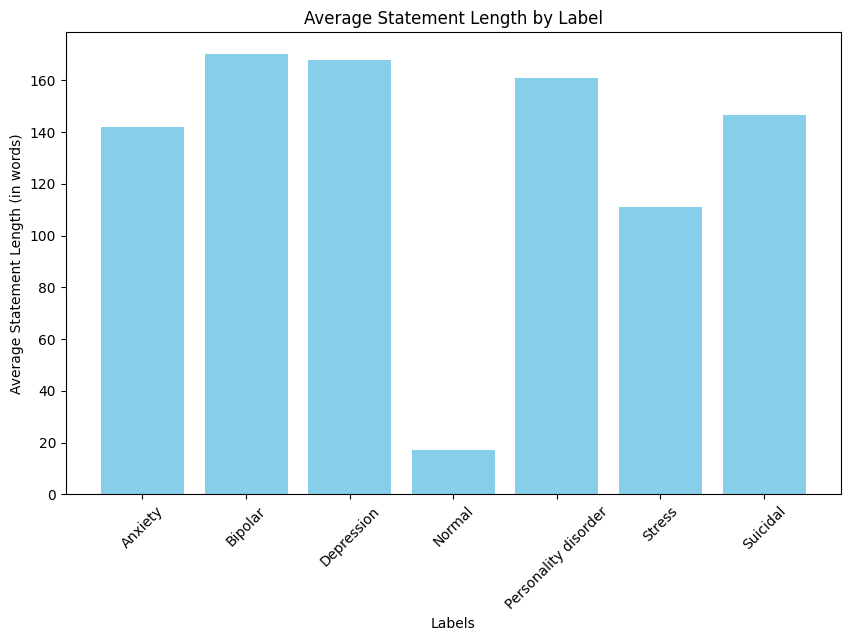

In [ ]:
# Clean text and calculate word counts
def calculate_avg_length(group):
    return group['statement'].apply(lambda x: len(x.split())).mean()

# Group by labels and calculate the average word count
avg_lengths = df.groupby('status').apply(calculate_avg_length)
avg_lengths_df = avg_lengths.reset_index(name='avg_length')



import matplotlib.pyplot as plt

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(avg_lengths_df['status'], avg_lengths_df['avg_length'], color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Average Statement Length (in words)')
plt.title('Average Statement Length by Label')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Pivot the dataframe
df['index'] = df.groupby('status').cumcount()
pivot_df = df.pivot(index='index', columns='status', values='statement')
pivot_df.reset_index(drop=True, inplace=True)

# Display the new DataFrame
display(pivot_df)


status,Anxiety,Bipolar,Depression,Normal,Personality disorder,Stress,Suicidal
0,oh my gosh,What birth control are you on? I tried an IUD ...,I recently went through a breakup and she said...,"Gr gr dreaming of ex crush to be my game, God",Is there anyone interested in joining a group ...,"He said he had not felt that way before, sugge...",I am so exhausted of this. Just when I think I...
1,"trouble sleeping, confused mind, restless hear...",Hypersexuality I was diagnosed with bipolar un...,"I do not know how to navigate these feelings, ...",wkwkwk what a joke,,My mom then hit me with the newspaper and it s...,I am 20 year old with some good friends but I ...
2,"All wrong, back off dear, forward doubt. Stay ...",Meditation I have been using the free meditati...,"So I have been with my bf for 5 months , and h...",Leaves are also standby in front of the PC ......,Anyone else have nothing in common with other ...,"until i met my new boyfriend, he is amazing, h...",it is looming around the corner again. It alwa...
3,I've shifted my focus to something else but I'...,Family question diagnosis - vent Start with th...,I have been severly bullied since i was 5 till...,Thank God even though it's just a ride through,Being a ghost would be my ideal form of existe...,October is Domestic Violence Awareness Month a...,there is.....foodAnd other things I will be ju...
4,"I'm restless and restless, it's been a month n...",Unable to stop talking to myself- any ideas/ex...,My mom made me go to a camp that she knows I h...,wedding teaser concept using the song day6 - o...,,I think he doesn't want to put in the effort f...,I am on zoloft and focalin and it is changed m...
...,...,...,...,...,...,...,...
16346,NaN,NaN,NaN,is that snow,NaN,NaN,NaN
16347,NaN,NaN,NaN,moulin rouge mad me cry once again,NaN,NaN,NaN
16348,NaN,NaN,NaN,trying to shout but can t find people on the list,NaN,NaN,NaN
16349,NaN,NaN,NaN,ughh can t find my red sox hat got ta wear thi...,NaN,NaN,NaN


In [ ]:
# Save DataFrame as CSV
#pivot_df.to_csv('combinedDataFlipped.csv', index=False)



# Download the CSV file
# from google.colab import files
# files.download('combinedDataFlipped.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-13-2a6ba8f642d6>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cleaned_statement'] = filtered_df['statement'].apply(preprocess_text)


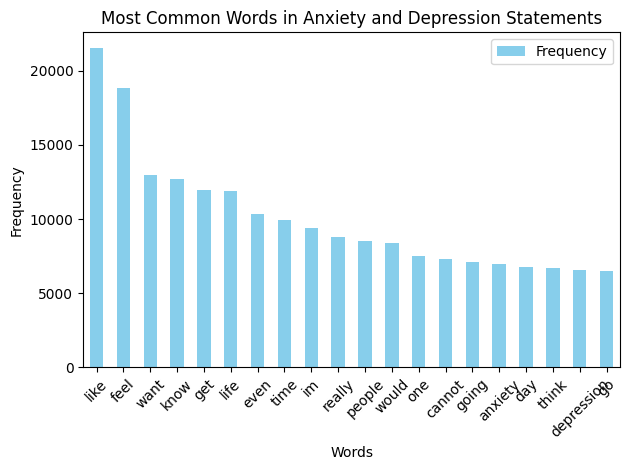

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

nltk.download('stopwords')
# Filter for relevant statuses
filtered_df = df[df['status'].isin(['Anxiety', 'Depression'])]

# Text preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Preprocess statements
filtered_df['cleaned_statement'] = filtered_df['statement'].apply(preprocess_text)
all_statements = ' '.join(filtered_df['cleaned_statement'])

# Tokenize & remove stopwords
tokens = all_statements.split()
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Count word frequencies
word_freq = Counter(filtered_tokens)
most_common_words = word_freq.most_common(20)
common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])


# Plot the word frequencies
common_words_df.plot(kind='bar', x='Word', y='Frequency', color='skyblue')
plt.title('Most Common Words in Anxiety and Depression Statements')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-14-58f483536158>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cleaned_statement'] = filtered_df['statement'].apply(preprocess_text)


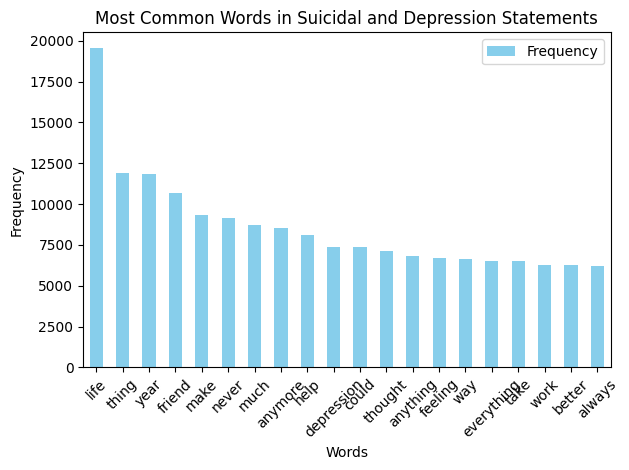

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('wordnet')

# Filter for relevant statuses
filtered_df = df[df['status'].isin(['Suicidal', 'Depression'])]

# Define a function for text preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Preprocess statements
filtered_df['cleaned_statement'] = filtered_df['statement'].apply(preprocess_text)
all_statements = ' '.join(filtered_df['cleaned_statement'])
tokens = all_statements.split()

# Remove stop words
stop_words = set(stopwords.words('english'))
custom_stop_words = {'like', 'feel', 'want', 'know', 'get', 'even', 'time', 'im', 'really', 'people', 'would', 'one', 'cannot', 'going', 'day', 'think', 'go'}
stop_words.update(custom_stop_words)
filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

# Count word frequencies
word_freq = Counter(lemmatized_tokens)
most_common_words = word_freq.most_common(20)
common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Plot the word frequencies
common_words_df.plot(kind='bar', x='Word', y='Frequency', color='skyblue')
plt.title('Most Common Words in Suicidal and Depression Statements')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
